In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Assignment/Task%207/Assignment%2011%20to%2016%20data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [3]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [4]:
x = df.drop(["User ID",'Purchased'],axis=1)
y = df.Purchased
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=7)

**Feature Scaling**

In [5]:
# None : 0.825
ms = MinMaxScaler() #0.8
ss = StandardScaler() #0.8375

In [6]:
X_train = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)

**Fitting Decision Tree Classification to the Training set**

In [7]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [8]:
y_pred = dtc.predict(X_test)

**Making the Confusion Matrix**

In [9]:
accuracy_score(y_pred,y_test)

0.8625

In [10]:
confusion_matrix(y_test,y_pred)

array([[47,  7],
       [ 4, 22]])

**Visualising the Training set results**

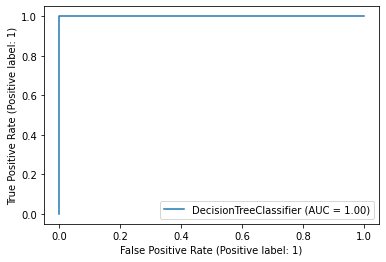

In [11]:
plot_roc_curve(dtc, X_train, dtc.predict(X_train));

**Visualising the Test set results**

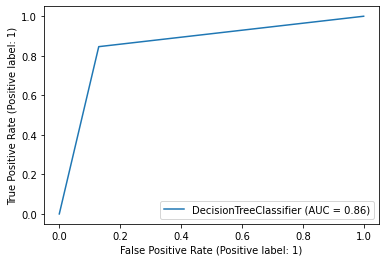

In [12]:
plot_roc_curve(dtc, X_test, y_test);